In [1]:
!pip install pymorphy2
!pip install razdel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 48.8 MB/s eta 0:00:0000:0100:01


In [2]:
import pickle
import numpy as np
import pandas as pd
import pymorphy2
from razdel import sentenize
from razdel import tokenize
import torch
from transformers import AutoTokenizer, AutoModel
import re
import gc
import tqdm

In [3]:
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny", output_hidden_states = True)
model.eval()

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(29564, 312, padding_idx=0)
    (position_embeddings): Embedding(512, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = AutoModel.from_pretrained("xlm-roberta-base", output_hidden_states = True)
model.eval()

**Проблема с этой моделью**

In [20]:
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruRoberta-large")

model = AutoModel.from_pretrained("sberbank-ai/ruRoberta-large", output_hidden_states=True)
model.eval()

Some weights of the model checkpoint at sberbank-ai/ruRoberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at sberbank-ai/ruRoberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to b

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (d

In [4]:
df = pd.read_csv("/kaggle/input/newsdataset1csv/1.csv")
df.dropna(inplace=True)

In [21]:
vectors = {}

In [6]:
pm = pymorphy2.MorphAnalyzer()

In [7]:
ws353_new = pd.read_csv("/kaggle/input/ws353-full/hj-wordsim353-all.csv")

**Я предварительно собрал инвертированный индекс для набора слов из ws353, так как файл vocabulary слишком большой**

In [8]:
with open('/kaggle/input/ws353-full/ws353_full.pkl', 'rb') as f:
    ws_full = pickle.load(f)

Проблема заключается в слудющем, я не понимаю как перекинуть вычисления на gpu. У меня в итоге вычислений после одной итерации vector is None, хотя там должны быть вектора, количество которых равно n_contexts. 

In [11]:
n_c = [50, 100, 200, 500, 1000, 2000]

In [9]:
from numpy.random import default_rng
rng = default_rng()

In [22]:
contexts = {}
vectors = {}

# **Запускать эту ячейку**

In [23]:
model.to('cuda')
# for n_contexts in n_c:
#     if n_contexts == 1000:
#         break
n_contexts = 2000
print(f'Number of contexts = {n_contexts}')
i = 1

for key, value in ws_full.items():
    print(f'Iteration {i} / {len(ws_full)}')
#     if i % 25 == 0:
#         with open(f'n_{n_contexts}_{i // 25}.pkl', 'wb') as f:
#             pickle.dump(contexts, f)
#         del(contexts)
#         gc.collect()
#         contexts = {}
    i += 1
    
    vector = None # здесь будут храниться эмбеддинги, то есть его размер будет (n_contexts, 312)
    n = 0
    size = n_contexts if n_contexts <= len(value) else len(value)
    indices = rng.choice(len(value), size, replace=False)
    for index in tqdm.tqdm(indices):
        idx, n_sent, w_idx = value[index]
        if n >= n_contexts:
            break
        n += 1
        string_to_parse = df.iloc[idx].values[1]
        string_to_parse = re.sub(' *\n\n *', '. ', string_to_parse)
        new_str = re.sub(' +|\n *\n| *\xa0| *\n', ' ', string_to_parse)
        sent = list(sentenize(new_str))[n_sent]

        with torch.no_grad():
            d = tokenizer(sent.text, return_offsets_mapping=True, return_tensors='pt', return_attention_mask=False, return_token_type_ids=False)
            offset_mapping = d.pop('offset_mapping')
            input_ids = d['input_ids'].to('cuda')
            try:
                sent_vec = model(input_ids).hidden_states
                layers = torch.tensor(np.array([i.to('cpu').numpy() for i in sent_vec[1:]]), dtype=torch.float32)
                word = list(tokenize(sent.text.lower()))[w_idx]
                start = np.where(offset_mapping[:, :, 0] == word.start)[1][0]
                stop = np.where(offset_mapping[:, :, 1] == word.stop)[1][0]
                if vector is None:
                    vector = [layers[:, :, start:stop+1, :].mean(axis=2)]
                else:
                    vector.append(layers[:, :, start:stop+1, :].mean(axis=2))
            except:
                continue
    vector = torch.stack(vector).mean(axis=0)
    vectors[key] = vector
# if (len(contexts)):
#     with open(f'n_{n_contexts}_{i // 25}.pkl', 'wb') as f:
#         pickle.dump(contexts, f)
#     del(contexts)
#     gc.collect()

Number of contexts = 2000
Iteration 1 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.70it/s]


Iteration 2 / 428


100%|██████████| 2000/2000 [01:00<00:00, 32.88it/s]


Iteration 3 / 428


100%|██████████| 2000/2000 [00:58<00:00, 34.09it/s]


Iteration 4 / 428


100%|██████████| 2000/2000 [00:58<00:00, 34.27it/s]


Iteration 5 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.70it/s]


Iteration 6 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.79it/s]


Iteration 7 / 428


100%|██████████| 2000/2000 [01:00<00:00, 33.10it/s]


Iteration 8 / 428


100%|██████████| 475/475 [00:14<00:00, 33.41it/s]


Iteration 9 / 428


100%|██████████| 2000/2000 [01:01<00:00, 32.77it/s]


Iteration 10 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.34it/s]


Iteration 11 / 428


100%|██████████| 2000/2000 [01:00<00:00, 32.84it/s]


Iteration 12 / 428


100%|██████████| 2000/2000 [00:58<00:00, 34.05it/s]


Iteration 13 / 428


100%|██████████| 1482/1482 [00:46<00:00, 32.01it/s]


Iteration 14 / 428


100%|██████████| 2000/2000 [00:57<00:00, 34.70it/s]


Iteration 15 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.75it/s]


Iteration 16 / 428


100%|██████████| 1090/1090 [00:32<00:00, 33.08it/s]


Iteration 17 / 428


100%|██████████| 2000/2000 [00:59<00:00, 33.60it/s]


Iteration 18 / 428


100%|██████████| 2000/2000 [00:57<00:00, 34.49it/s]


Iteration 19 / 428


100%|██████████| 2000/2000 [00:57<00:00, 35.01it/s]


Iteration 20 / 428


 44%|████▎     | 874/2000 [00:26<00:34, 32.51it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [12]:
with open('vectors_2000_tiny.pkl', 'wb') as file:
    pickle.dump(vectors, file)

In [13]:
score = ws353_new['sim'].values

In [17]:
my_score = [[] for _ in range(3)]
for idx in range(ws353_new.shape[0]):
    w1 = pm.parse(ws353_new.iloc[idx].word1)[0].normal_form
    w2 = pm.parse(ws353_new.iloc[idx].word2)[0].normal_form
    for j in range(3):
        my_score[j].append(cosine_sim(vectors[w1][j], vectors[w2][j]).item())

In [19]:
print([spearmanr(score, my_score[i]).correlation for i in range(3)])

[0.49814499440208915, 0.5028291444279501, 0.5471547426905772]


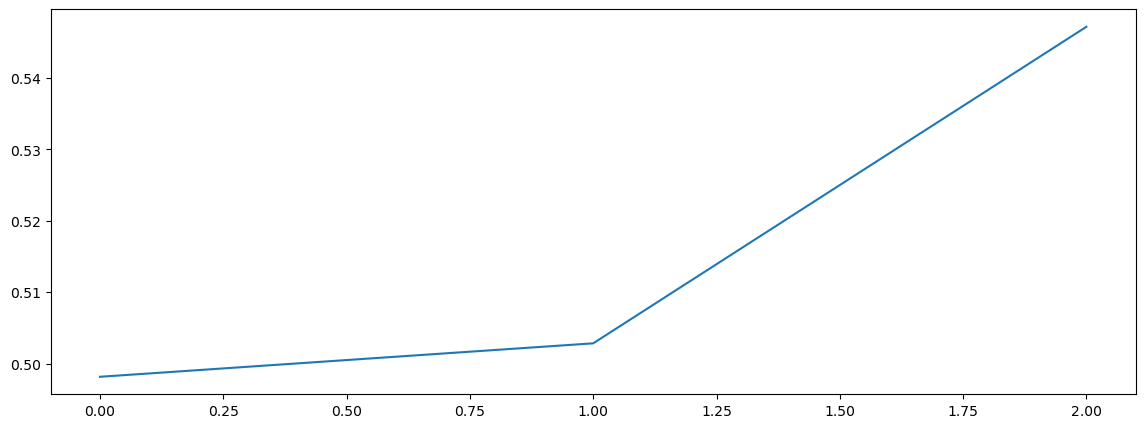

In [18]:
plt.figure(figsize=(14, 5))
plt.plot([spearmanr(score, my_score[i]).correlation for i in range(3)])

In [ ]:
contexts['поражение'][0].mean()

Этот кусок кода я использовал, чтобы на CPU произвести вычисления с маленькой моделью. Я решил посмотреть, как качество эмбеддингов зависит от слоя модели (здесь их всего 3). Качество на 200 контекстах получил в районе 0.57, что считаю очень хорошим результатом.

In [ ]:
for n_contexts in n_c:
    if n_contexts != 500:
        continue
    print(f'Number of contexts = {n_contexts}')
    i = 1
    contexts = {}
    for key, value in ws_full.items():
        print(f'Iteration {i} / {len(ws_full)}')
        i += 1
        vector = None # здесь будут храниться эмбеддинги, то есть его размер будет (n_contexts, 312)
        n = 0
        size = n_contexts if n_contexts <= len(value) else len(value)
        indices = rng.choice(len(value), size, replace=False)
        for index in tqdm.tqdm(indices):
            idx, n_sent, w_idx = value[index]
            if n >= n_contexts:
                break
            n += 1
            string_to_parse = df.iloc[idx].values[1]
            string_to_parse = re.sub(' *\n\n *', '. ', string_to_parse)
            new_str = re.sub(' +|\n *\n| *\xa0| *\n', ' ', string_to_parse)
            sent = list(sentenize(new_str))[n_sent]

            with torch.no_grad():
                d = tokenizer(sent.text, return_offsets_mapping=True, return_tensors='pt', return_attention_mask=False, return_token_type_ids=False)
                offset_mapping = d.pop('offset_mapping')
                input_ids = d['input_ids']
                try:
                    layers = torch.tensor(np.array([i.numpy() for i in list(model(input_ids).hidden_states)[1:]]), dtype=torch.float32)
                    word = list(tokenize(sent.text.lower()))[w_idx]
                    start = np.where(offset_mapping[:, :, 0] == word.start)[1][0]
                    stop = np.where(offset_mapping[:, :, 1] == word.stop)[1][0]
                    if vector is None:
                        vector = [layers[:, :, start:stop+1:, ]]
                    else:
                        vector.append(layers[:, :, start:stop+1, :])
                except:
                    continue
        contexts[key] = vector
    vectors[n_contexts] = contexts

In [ ]:
from itertools import product

In [ ]:
def g_pooling(collection, func, axis=0):
    if func == torch.mean:
        return torch.stack(tuple(func(vector[:, 0, ...], axis=axis) for vector in collection), dim=0)
    return torch.stack(tuple(func(vector[:, 0, ...], axis=axis).values for vector in collection), dim=0)
def f_pooling(collection, func, axis=0):
    if func == torch.mean:
        return func(collection, axis=axis)
    return func(collection, axis=axis).values
    

In [ ]:
funcs = {'mean': torch.mean, 'min': torch.min, 'max': torch.max}

In [ ]:
n_500 ={}
keys = list(product(['mean', 'max', 'min'], repeat=2))
for key in tqdm.tqdm(keys):
    f, g = key
    stats = {}
    print(key)
    for word, lst in vectors[500].items():
        stats[word] = f_pooling(g_pooling(lst, funcs[g], 1), funcs[f])
    n_500[key] = stats
    

In [ ]:
with open('n_200.pkl', 'wb') as f:
    pickle.dump(n_200, f)

In [15]:
def cosine_sim(x, y):
    return (x @ y.T) / (np.linalg.norm(x) * np.linalg.norm(y))

In [16]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [ ]:
score = ws353_new['sim']
res = {}
for key in keys:
    my_score = [[], [], []]
    for idx in range(ws353_new.shape[0]):
        w1 = pm.parse(ws353_new.iloc[idx].word1)[0].normal_form
        w2 = pm.parse(ws353_new.iloc[idx].word2)[0].normal_form
        for i in range(3):
            my_score[i].append(cosine_sim(n_200[(key[0], key[1])][w1][i], n_200[(key[0], key[1])][w2][i]))
    res[key] = my_score
plt.figure(figsize=(14, 7))
plt.xticks(np.arange(0, 3))
plt.grid()
for key in keys:
    plt.plot(range(3), [spearmanr(res[key][i], score).correlation for i in range(3)], label=f'f={key[0]}, g={key[1]}')
plt.legend()

In [ ]:
score = ws353_new['sim']
res = {}
for key in keys:
    my_score = [[], [], []]
    for idx in range(ws353_new.shape[0]):
        w1 = pm.parse(ws353_new.iloc[idx].word1)[0].normal_form
        w2 = pm.parse(ws353_new.iloc[idx].word2)[0].normal_form
        for i in range(3):
            my_score[i].append(cosine_sim(n_100[(key[0], key[1])][w1][i], n_50[(key[0], key[1])][w2][i]))
    res[key] = my_score

In [ ]:
[spearmanr(res[('mean','mean')][i], score).correlation for i in range(3)]

In [ ]:
plt.figure(figsize=(14, 7))
plt.xticks(np.arange(0, 3))
plt.grid()
for key in keys:
    plt.plot(range(3), [spearmanr(res[key][i], score).correlation for i in range(3)], label=f'f={key[0]}, g={key[1]}')
plt.legend()

In [ ]:
score = ws353_new['sim']
res = {}
for key in keys:
    my_score = [[], [], []]
    for idx in range(ws353_new.shape[0]):
        w1 = pm.parse(ws353_new.iloc[idx].word1)[0].normal_form
        w2 = pm.parse(ws353_new.iloc[idx].word2)[0].normal_form
        for i in range(3):
            my_score[i].append(cosine_sim(n_50[(key[0], key[1])][w1][i], n_50[(key[0], key[1])][w2][i]))
    res[key] = my_score

In [ ]:
plt.figure(figsize=(14, 7))
plt.xticks(np.arange(0, 3))
plt.grid()
for key in keys:
    plt.plot(range(3), [spearmanr(res[key][i], score).correlation for i in range(3)], label=f'f={key[0]}, g={key[1]}')
plt.legend()